# Prelude

Given that we only have two lectures together, I will focus on illustrating core concepts that I find particularly important.

## Why are we here?

Knowledge of Machine Learning techniques becomes increasingly important inside and outside of academic research: 
* big data
* increasingly tech-based economy, e.g. emerging fintech, robo-lawyers, autonomous driving... 
* we can leverage new tools for better policies and policy making. ML techniques might enable more targeted and effective government programs that cater to individual characteristics. 
* ML techniques have demonstrated astonishing predictive performance on many tasks, e.g. forecasting lending, fraud...
* ML techniques allow us to leverage new data sources, e.g. images, historical archives, natural language...
* Potentially large gains from combining machine learning and classical econometric models. $\rightarrow$ hybrid approaches

At the same time, the availability of ML toolboxes in all widely used software packages has made ML algorithms extremely easy to apply. **This is a blessing and a curse**:
* On the one hand, the abundance of software makes prototyping new models extremely efficient and fast
* On the other hand, black-boxy toolboxes obscure what is going on under the hood. Without a sound understanding of the underlying algorithms, important problems are likely overlooked! 
$\rightarrow$ **Toolboxes cannot take the "thinking" away from us!** 

If you'd like to read, learn, and think more on your own, I recommend the following ressources:

* For programming in Python:
    * I coded up a small Python refresher which covers the essential skills. You can find it in the GitHub repository. Feel free to refer to that any time. 
    * **Quantecon** (https://quantecon.org/). Targeted more towards economists, but the website offers great tutorials on many different subjects.
    * **Stackoverflow** (https://stackoverflow.com/). For all your bugs and programming sorrows. "The most important skill as a programmer is knowing what to google."
* Fore more practice & exposure to Machine Learning:
    * **Kaggle** (https://www.kaggle.com/). The website offers competitions on prediction tasks from many different fields. Often companies even offer real prices! The website not only offers tons of free data to play around with, but competitors often make their solutions available. 
    * **Medium** & **Towards Data Science** (https://medium.com/; https://towardsdatascience.com/). The quality of the individual blog posts varies, but overall I have found many great resources here! 
    * **GitHub** (https://github.com/). Many cool algorithms and explainers can be found on GitHub as well. The codes of academic papers in data science as well as open courses on ML and data science are usually also provided here. 
* As food for thought and on the philosophical aspects of AI and ML:
    * **Lex Friedman Podcast** (https://open.spotify.com/show/2MAi0BvDc6GTFvKFPXnkCL). Generally, the individual episodes are on many different topics not all related to ML and AI. The respective episodes, however, are usually very insightful and address the big challenges in the field. 


## Learning Outcomes?

We will use your programming and econometrics competencies to gain:

* exposure to Python and using ML models in Python. I aim to bridge the gap between what is on the slides and the black-boxy toolboxes. For most small examples I thus also provide hand-written codes that replicate the toolbox results. See these as an opportunity to play around by yourself and take a deeper dive into what is going on under the hood. For all tasks, you can of course also jump straight to the toolbox implementation. In this case, the packages used are just one of many and you can of course also use any other package that you might prefer. 
* more practice with the algorithms learned in class
* the ability to apply models to actual data
* a more intuitive understanding of pitfalls as well as the advantages and disadvantages of ML models 


## Getting Started

As much as I would love to talk extensively about the many exciting issues in this field, we are going to focus on two particularly important ones:

### Issue 1: Forecasting vs. Causal Inference

In empirical research we are often facing two different agendas:
* Forecasting/Prediction: find some function that provides a good prediction of $y$ as a function of $x$.
    * we are interested in $\hat{y}$
* Causal Inference: What is the effect of a particular variable $x$ on the outcome $y$?
    * we are interested in $\hat{\beta}$
    
As we will see, though strongly related, both require a slightly different mindset and a slightly different approach to data analysis:
* Can we use Lasso for causal inference tasks?
* how can we do model selection in this case?
* Do other approaches exist?
    
### Issue 2: The Curse of Dimensionality, Overfitting & Underfitting

With more and more data becoming available, we would of course like to include as much **relevant** information as possible. However:
* We cannot compute e.g. an OLS estimator if $p>n$.
* While we can always improve in-sample fit by increasing model complexity, out-of-sample fit diminishes, if the model becomes too complex.

Naturally, we would like to know:
* Which approaches exist to balance the underfitting/overfitting tradeoff?
* How can we conduct model selection in this case?

*Please keep in mind that we have very little time together such that we can only touch upon the basics. The material covered in these brief lectures is thus by far non-exhaustive!* 


# Lecture 1 
### 1.0 Setup

At the beginning of every Python script, we read in the python packages required for a given exercise.

In [1]:
# import Python packages
%matplotlib inline  
import pandas as pd 
import numpy as np  
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
from functools import reduce
import statsmodels.api as sm
from IPython.display import Image

plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size

###  2.0 Data

For this exercise, I downloaded a house price data set from [Kaggle.com](https://www.kaggle.com/ "Kaggle.com"). As mentioned above, Kaggle regularly hosts machine learning competitions and also offers many free data sets provided by the community. For this lecture I chose the [Melbourne Housing Market](https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv "Kaggledta.com") dataset. You can find a detailed description of it by clicking the link. 

As a first exercise, imagine we wanted to predict house prices.

In [2]:
# read in the Melbourne Housing data set
housing_raw = pd.read_csv('Melbourne_housing_FULL.csv')

Let's select a subset of a couple of variables: The house price - i.e. our outcome variable -, the number of rooms, the number of bedrooms, the number of bathrooms, the number of car parking spots, the size of the plot, the distance from the CBD, the year of construction, as well as the location of the house.

#### Question:
Can you think of any other potentially important predictors?


In [3]:
# select a subset of variables
housing = housing_raw[['Price','Rooms','Bedroom2','Bathroom','Car','Landsize','Distance','YearBuilt'
                       ,'Lattitude','Longtitude']]

# drop rows with missing values
housing = housing.dropna()
housing

,Price,Rooms,Bedroom2,Bathroom,Car,Landsize,Distance,YearBuilt,Lattitude,Longtitude
2,1035000.0,2,2.0,1.0,0.0,156.0,2.5,1900.0,-37.80790,144.99340
4,1465000.0,3,3.0,2.0,0.0,134.0,2.5,1900.0,-37.80930,144.99440
6,1600000.0,4,3.0,1.0,2.0,120.0,2.5,2014.0,-37.80720,144.99410
11,1876000.0,3,4.0,2.0,0.0,245.0,2.5,1910.0,-37.80240,144.99930
14,1636000.0,2,2.0,1.0,2.0,256.0,2.5,1890.0,-37.80600,144.99540
...,...,...,...,...,...,...,...,...,...,...
34847,500000.0,3,3.0,2.0,2.0,383.0,25.5,2016.0,-37.61940,145.03951
34849,570000.0,3,3.0,2.0,2.0,404.0,25.5,2012.0,-37.61031,145.03393
34853,888000.0,2,2.0,2.0,1.0,98.0,6.3,2018.0,-37.81551,144.88826
34854,705000.0,2,2.0,1.0,2.0,220.0,6.3,2000.0,-37.82286,144.87856


### 3.0 Predicting house prices with OLS

To start off, we will attempt to predict house prices with simple OLS. To make things slightly more interesting, we will build our own class for computing the OLS estimators as well as other useful statistics. As a simple way of computing robust standard errors, we will also add a Bootstrap procedure.   

**If you prefer, you can ignore section 3.1 and jump to the implementation with `statsmodels` in section 3.2.**
 
### 3.1 Implementation with own Code
 

#### 3.1.1 Building the OLS `class`

Classes are the fundamental building blocks of `Python`. I hope the below code helps you foster a deeper understanding of how classes work and also helps you peek behind the "black-boxyness" of python packages with similar functionality. 

In [4]:
class OLS:

    """
    This code implements a simple OLS regression. The inputs Y and X must be in numpy matrix format. 
    """
    
    def __init__(self, Y, X):
        #Initialize the dependent and independent variables
        self.Y, self.X = Y, X 
        
        # terminate and produce error message, if Y or X are of wrong type
        if isinstance(X,np.ndarray) == False:
            raise TypeError('X is not a numpy ndarray!')
        if isinstance(Y,np.ndarray) == False:
            raise TypeError('Y is not a numpy ndarray!')
    
    # here I moved the actual regression into its own function to streamline the bootstrap code
    def get_betas(self, YY, XX):
        
        #Estimate the beta coefficients
        return np.linalg.inv(XX.T @ XX) @ (XX.T @ YY)
    
    
    def estimate(self, se_method = 'standard', B = 1000):
        
        #unpack Y and X
        Y, X = self.Y, self.X
        
        # If not input is given, we simply use standard standard errors. It is useful to also print a message to 
        # to make users aware of the standard_errors used
        print("Standard Errors computed using method:", se_method)
        
        # run the OLS regression by calling the get_betas() function
        self.beta = self.get_betas(Y, X)
        
        # ------------------------------------------------------------------------------------------------------
        
        if se_method == 'standard':
            #compute the regression residuals
            eps = Y - X @ self.beta
        
            #compute the residual variance
            s_hat = 1/(Y.shape[0] - self.beta.shape[0]) * eps.T @ eps
            
            #compute the standard errors
            self.se = np.sqrt(np.diag(np.linalg.inv(X.T @ X) * s_hat.item())).reshape((self.beta.shape[0],1))
            
            #compute confidence intervals
            CI_upper = self.beta + stats.norm.ppf(0.975)*self.se
            CI_lower = self.beta - stats.norm.ppf(0.975)*self.se
        
        elif se_method == 'bootstrap':
            print("Number of Bootstrap samples:", B)
            
            # initialize the array of bootstrap estimates
            self.bootstrapbeta = np.empty([self.beta.shape[0],B])
            
            # compute the coefficients over the bootstrap sample
            for i in range(B):
                
                # generate a vector of randomly drawn indices with replacement
                random_indices = np.random.choice(Y.shape[0], size=Y.shape[0], replace=True)
                
                # select the corresponding rows of Y and X
                Y_b = Y[random_indices]
                X_b = X[random_indices]
                
                # compute the regression coefficients for the bootstrap samples
                beta = self.get_betas(Y_b, X_b)
                
                # collect all bootstrap coefficients
                self.bootstrapbeta[:,i] = beta.ravel()
                
            # compute bootstrap standard errors
            self.se = np.sqrt(np.mean(np.square(self.bootstrapbeta-self.beta),axis=1)).reshape((self.beta.shape[0],1))
        
            #compute the bootstrap confidence intervals
            CI_upper = self.beta + 2*self.se
            CI_lower = self.beta - 2*self.se
        
        # ------------------------------------------------------------------------------------------------------
        
        #compute t-statistic for standard hypothesis test
        t = np.abs(self.beta/self.se)

        #compute p-values for standard hypothesis test
        p_vals = 2*(1-stats.norm.cdf(np.abs(t)))
        
        #generate an output table
        outmat = np.concatenate((self.beta,self.se,t,p_vals,CI_lower,CI_upper),axis=1)
        table = pd.DataFrame(outmat)
        table.columns =['beta', 'se','t-statistic','p-value','CI - lower','CI - upper'] 
        
        return table
    
    def hypothesis_test(self,i,β_0):
        # here a small if statement tests whether estimates have been computed before. If not, we simply call the
        # "estimate" function of our class
        if hasattr(self, 'beta'):
            beta, se = self.beta, self.se
            print("Previous estimates available. Hypothesis test is conducted based on previous estimates.")
        else:
            self.estimate()
            beta, se = self.beta, self.se
            print("No previous estimates available. Estimating OLS to obtain coefficients.")
        
        
        # compute the test statistic
        t = np.abs((beta[i] - β_0)/se.T[i])
        
        #compute p-values
        p_vals = 2*(1-stats.norm.cdf(np.abs(t)))
        
        # create output table
        outmat = np.concatenate((t,p_vals),axis=1)
        table = pd.DataFrame(outmat)
        table.columns =['t-statistic','p-value']
        
        return table

With the functionality of our `OLS class`, we can now specify `OLS objects` and call `OLS class functions` on them. In our case, this allows us to easily compute standard errors in standard fashion or using bootstrap. Given that we also specified default input arguments and have the class print messages, it is also fairly robust to user error. 

Let's now use it on our house price dataset:

#### 3.1.2 Estimating the regression with non-robust standard errors

In [5]:
# generate the Y, and X matrices
Y = np.asarray([housing.Price]).T
X = np.asarray(housing.iloc[:,1:])

# add a constant to the independent variables
X = np.hstack((np.ones([X.shape[0],1]), X))

In [6]:
# define the house price regression object
HP_reg = OLS(Y,X)

In [7]:
# estimate a regression with standard standard errors
HP_reg.estimate()

Standard Errors computed using method: standard


,beta,se,t-statistic,p-value,CI - lower,CI - upper
0,-1.542411e+08,5.662622e+06,27.238469,0.000000e+00,-1.653397e+08,-1.431426e+08
1,2.187334e+05,1.770405e+04,12.354990,0.000000e+00,1.840341e+05,2.534327e+05
2,2.218366e+04,1.775590e+04,1.249369,2.115303e-01,-1.261726e+04,5.698457e+04
3,2.742361e+05,8.392414e+03,32.676667,0.000000e+00,2.577873e+05,2.906849e+05
4,6.902475e+04,5.082994e+03,13.579547,0.000000e+00,5.906226e+04,7.898723e+04
5,3.050285e+01,4.093579e+00,7.451389,9.237056e-14,2.247958e+01,3.852611e+01
6,-3.415782e+04,7.586077e+02,45.026992,0.000000e+00,-3.564467e+04,-3.267098e+04
7,-4.969205e+03,1.338045e+02,37.137808,0.000000e+00,-5.231457e+03,-4.706953e+03
8,-1.269495e+06,5.312626e+04,23.895812,0.000000e+00,-1.373621e+06,-1.165370e+06
9,8.011514e+05,4.103273e+04,19.524693,0.000000e+00,7.207288e+05,8.815741e+05


#### 3.1.3 Estimating the regression with Bootstrap standard errors

In [8]:
# set a seed for reproducability
np.random.seed(1234)

# estimate a regression with bootstrap standard errors (here I use the default bootstrap sample size)
HP_reg.estimate('bootstrap')

Standard Errors computed using method: bootstrap
Number of Bootstrap samples: 1000


,beta,se,t-statistic,p-value,CI - lower,CI - upper
0,-1.542411e+08,5.935885e+06,25.984526,0.000000e+00,-1.661129e+08,-1.423694e+08
1,2.187334e+05,3.321442e+04,6.585494,4.533751e-11,1.523045e+05,2.851622e+05
2,2.218366e+04,3.185383e+04,0.696421,4.861655e-01,-4.152399e+04,8.589131e+04
3,2.742361e+05,1.436979e+04,19.084214,0.000000e+00,2.454965e+05,3.029757e+05
4,6.902475e+04,6.811783e+03,10.133139,0.000000e+00,5.540118e+04,8.264832e+04
5,3.050285e+01,6.513893e+00,4.682737,2.830702e-06,1.747506e+01,4.353063e+01
6,-3.415782e+04,1.043883e+03,32.721883,0.000000e+00,-3.624559e+04,-3.207006e+04
7,-4.969205e+03,3.006504e+02,16.528185,0.000000e+00,-5.570506e+03,-4.367904e+03
8,-1.269495e+06,4.753209e+04,26.708173,0.000000e+00,-1.364559e+06,-1.174431e+06
9,8.011514e+05,3.879750e+04,20.649562,0.000000e+00,7.235564e+05,8.787464e+05


#### Questions:
* Which predictors are economically/statistically significant? Which ones are not?
* Are you surprised by any of the results?
* Did bootstrap standard errors change any of the conclusions?
* Why do you think/don't you think that statistical significance is a good indicator for whether a predictor is useful in a forecasting exercise?


### 3.2 Implementation with `statsmodels`

#### 3.2.1 running the regression with non-robust standard errors
Build X and Y.

In [9]:
# generate the Y, and X matrices
Y = np.asarray([housing.Price]).T
X = np.asarray(housing.iloc[:,1:])

# add a constant to the independent variables
X = np.hstack((np.ones([X.shape[0],1]), X))

Run the regression.

In [10]:
# run the regression
model = sm.OLS(Y, X)
results = model.fit()

# display output table
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1457.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:01:40   Log-Likelihood:            -1.5098e+05
No. Observations:               10459   AIC:                         3.020e+05
Df Residuals:                   10449   BIC:                         3.021e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.542e+08   5.66e+06    -27.238      0.000   -1.65e+08   -1.43e+08
x1          2.187e+05   1.77e+04     12.355      0.000    1.84e+05    2.53e+05
x2          2.218e+04   1.78e+04      1.249      0.212   -1.26e+04     5.7e+04
x3          2.742e+05   8392.414     32.677      0.000    2.58e+05    2.91e+05
x4          6.902e+04   5082.994     13.580      0.000    5.91e+04     7.9e+04
x5            30.5028      4.094      7.451      0.000      22.479      38.527
x6         -3.416e+04    758.608    -45.027      0.000   -3.56e+04   -3.27e+04
x7         -4969.2049    133.804    -37.138      0.000   -5231.487   -4706.923
x8         -1.269e+06   5.31e+04    -23.896      0.000   -1.37e+06   -1.17e+06
x9          8.012e+05    4.1e+04     19.525      0.000    7.21e+05    8.82e+05
==============================================================================
Omnibus:                     6799.969   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251030.115
Skew:                           2.589   Prob(JB):                         0.00
Kurtosis:                      26.435   Cond. No.                     2.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

First, note that `statsmodels` and our own `class` indeed give the exact same results. 

#### 3.2.2 Estimating the regression with Bootstrap standard errors

Given that `statsmodels` does not offer bootstrap standard errors, we need to write a wrapper function. First, we need to save the $\beta$ from the original regression.

In [11]:
beta_ = results.params.ravel()[:,None]

We can now write a loop to compute Bootstrap standard errors. To ensure robustness, let's put it in a small function.

In [12]:
def Bootstrap(Y,X,B=1000):

    # initialize the array of bootstrap estimates
    bootstrapbeta = np.empty([beta_.shape[0],B])

    # compute the coefficients over the bootstrap sample
    for i in range(B):

        # generate a vector of randomly drawn indices with replacement
        random_indices = np.random.choice(Y.shape[0], size=Y.shape[0], replace=True)

        # select the corresponding rows of Y and X
        Y_b = Y[random_indices]
        X_b = X[random_indices]

        # run the regression with statsmodels
        model = sm.OLS(Y_b, X_b)
        results = model.fit()

        beta = results.params.ravel()

        # collect all bootstrap coefficients
        bootstrapbeta[:,i] = beta.ravel()

    # compute bootstrap standard errors
    se = np.sqrt(np.mean(np.square(bootstrapbeta-beta_),axis=1))[:,None]

    #compute the bootstrap confidence intervals
    CI_upper = beta_ + 2*se
    CI_lower = beta_ - 2*se

    # ------------------------------------------------------------------------------------------------------

    #compute t-statistic for standard hypothesis test
    t = np.abs(beta_/se)

    #compute p-values for standard hypothesis test
    p_vals = 2*(1-stats.norm.cdf(np.abs(t)))

    #generate an output table
    outmat = np.concatenate((beta_,se,t,p_vals,CI_lower,CI_upper),axis=1)
    table = pd.DataFrame(outmat)
    table.columns =['beta', 'se','t-statistic','p-value','CI - lower','CI - upper']
    
    # return the output table
    return table

Call the `Bootstrap` function.

In [13]:
# set a seed for reproducability
np.random.seed(1234)

# run the regression using the bootstrap function
Bootstrap(Y,X,1000)

,beta,se,t-statistic,p-value,CI - lower,CI - upper
0,-1.542411e+08,5.935885e+06,25.984526,0.000000e+00,-1.661129e+08,-1.423694e+08
1,2.187334e+05,3.321442e+04,6.585494,4.533751e-11,1.523045e+05,2.851622e+05
2,2.218366e+04,3.185383e+04,0.696421,4.861655e-01,-4.152399e+04,8.589131e+04
3,2.742361e+05,1.436979e+04,19.084214,0.000000e+00,2.454965e+05,3.029757e+05
4,6.902475e+04,6.811783e+03,10.133139,0.000000e+00,5.540118e+04,8.264832e+04
5,3.050285e+01,6.513893e+00,4.682737,2.830702e-06,1.747506e+01,4.353063e+01
6,-3.415782e+04,1.043883e+03,32.721883,0.000000e+00,-3.624559e+04,-3.207006e+04
7,-4.969205e+03,3.006504e+02,16.528185,0.000000e+00,-5.570506e+03,-4.367904e+03
8,-1.269495e+06,4.753209e+04,26.708173,0.000000e+00,-1.364559e+06,-1.174431e+06
9,8.011514e+05,3.879750e+04,20.649562,0.000000e+00,7.235564e+05,8.787464e+05


### 4.0 Cross-Validation

Ultimately, we are interested in out-of-sample forecasting performance. That is, we want to predict the prices of houses that the model "has not seen"/been trained on. 

Cross-Validation offers a way to compute the *Expected out-of-sample loss* based on a set of training data: 


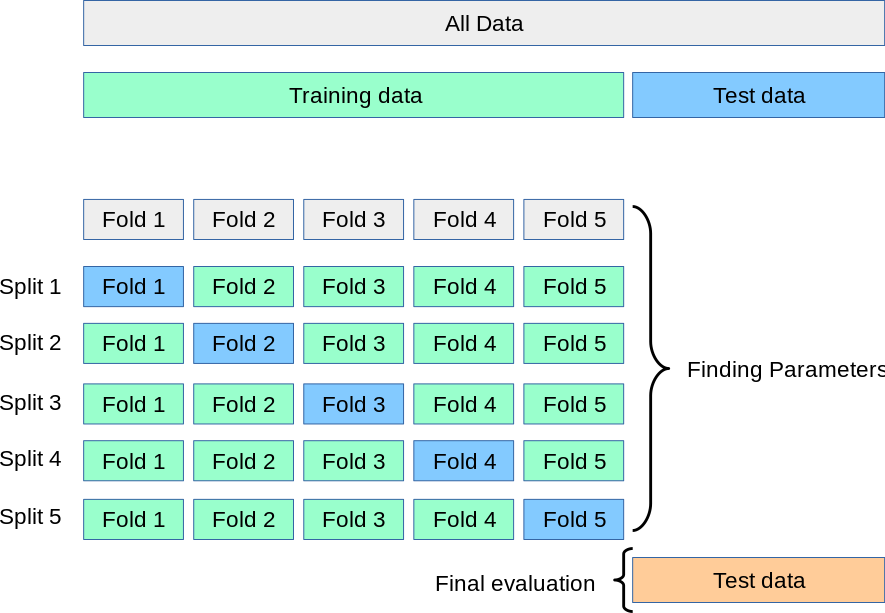

In [14]:
Image(filename = "grid_search_cross_validation.png")

*Source: scikit-learn 1.1.2 documentation.*

We can then compute the expected out-of-sample loss as an average across folds for any performance metric, $e$, that we might prefer:

$$
\hat{e}_{oos} = \sum_k^K e_k
$$

**You can ignore section 4.1 and jump to the implementation with `statsmodels` in section 4.2.**

### 4.1 Implementation with own code

Let us again write a small function that operates on our class and does CV for us. For k-fold cross-validation, we always use k-1 chunks as training data and the 1 data chunk as testing data set.

In [15]:
def CV_OLS(Y, X, k = 10):
    # generate arrays containing the indices of the k data chunks
    ids = list(range(len(Y)))
    chunks = np.asarray(np.array_split(np.array(ids),k))
        
    # read out the sample size
    n = list(range(len(Y)))
    
    # convert k into a list
    a = np.arange(k)
    
    # initialize out-of-sample and in-sample loss
    D_oos = []
    D_is = []
    MSE_oos = []
    MSE_is = []
    R2_oos = []
    R2_is = []
    
    
    # iterate over the folds to compute the CV standard error
    for i in a:
        
        # obtain the indeces of the data belonging to the training sample
        b_train = a[np.arange(len(a))!=i]
        subid_train = np.concatenate( chunks[b_train], axis=0 )
        
        # obtain the indices of the data belonging to the test sample
        b_test =  a[np.arange(len(a)) ==i]
        subid_test = np.concatenate( chunks[b_test], axis=0 )
        
        # devide the data into test and training samples
        Y_train = Y[subid_train]
        X_train = X[subid_train,:]
        Y_test = Y[subid_test]
        X_test = X[subid_test,:]
        
        # use the OLS class to estimate the parameters on the training sample
        estimate_train = OLS(Y_train,X_train)
        estimate_train.estimate()

        # compute the out-of-sample error
        error_oos = Y_test - X_test @ estimate_train.beta
        
        # compute the in-sample error
        error_is = Y_train - X_train @ estimate_train.beta

        # compute DOOS
        D_oos.append(np.sum(np.square(error_oos),axis=0))
        D_is.append(np.sum(np.square(error_is),axis=0))
            
        # compute MSE
        MSE_oos.append(np.mean(np.square(error_oos),axis=0))
        MSE_is.append(np.mean(np.square(error_is),axis=0))
        
        # compute R^2
        R2_oos.append(1 - MSE_oos[-1]/np.var(Y_test))
        R2_is.append(1 - MSE_is[-1]/np.var(Y_train))

        
    # compute the expected out-of-sample and in-sample loss for Deviance 
    E_D_oos = np.mean(D_oos)
    E_D_is = np.mean(D_is)
    
    # compute the expected out-of-sample and in-sample loss for MSE
    E_MSE_oos = np.mean(MSE_oos)
    E_MSE_is = np.mean(MSE_is)

    # compute the expected out-of-sample and in-sample loss for R2
    E_R2_oos = np.mean(R2_oos)
    E_R2_is = np.mean(R2_is)
    
    # compute the CV standard errors for Deviance
    se_D_oos = np.sqrt(np.var(D_oos,ddof=1))
    se_D_is  = np.sqrt(np.var(D_is,ddof=1))
    
    # compute the CV standard errors for Deviance
    se_MSE_oos = np.sqrt(np.var(MSE_oos,ddof=1))
    se_MSE_is  = np.sqrt(np.var(MSE_is,ddof=1))
    
    # compute the CV standard errors for Deviance
    se_R2_oos = np.sqrt(np.var(R2_oos,ddof=1))
    se_R2_is  = np.sqrt(np.var(R2_is,ddof=1))
    
    
    # create output table
    names = [np.array(['in-sample', 'in-sample', 'in-sample', 'out-of-sample', 'out-of-sample', 'out-of-sample']),
              np.array(['Deviance','MSE','R2','Deviance','MSE','R2'])]
    outmat = [[E_D_is,se_D_is],[E_MSE_is,se_MSE_is], [E_R2_is,se_R2_is],
             [E_D_oos,se_D_oos],[E_MSE_oos,se_MSE_oos], [E_R2_oos,se_R2_oos]]
    table = pd.DataFrame(outmat,index=names)
    table.columns =['$\hat{e}$','$se(\hat{e})$'] 
    
    # return table as output
    return table

Let's now call the function on our data:

In [16]:
%%capture
# use a cell magic to supress output from the OLS.estimate() class

# run cross-validation
out = CV_OLS(Y,X,10)

In [17]:
# print the output   
out

$\hat{e}$  $se(\hat{e})$
in-sample     Deviance  1.903003e+15   4.739279e+13
              MSE       2.021654e+11   5.034502e+09
              R2        5.566360e-01   7.487237e-03
out-of-sample Deviance  2.138766e+14   4.739170e+13
              MSE       2.044899e+11   4.530461e+10
              R2        5.411131e-01   6.618815e-02

Looking at the $R^2$, we can see that the out-of-sample fit is slightly worse. With our regression, we can explain 56% of in-sample variation and 54% of out-of-sample variation.

### 4.2 Implementation with `statsmodels`

Let us again write a small function that operates on our class and does CV for us. For k-fold cross-validation, we always use k-1 chunks as training data and the 1 data chunk as testing data set. 

In [18]:
def CV_OLS(Y, X, k = 10):
    # generate arrays containing the indices of the k data chunks
    ids = list(range(len(Y)))
    chunks = np.asarray(np.array_split(np.array(ids),k))
        
    # read out the sample size
    n = list(range(len(Y)))
    
    # convert k into a list
    a = np.arange(k)
    
    # initialize out-of-sample and in-sample loss
    D_oos = []
    D_is = []
    MSE_oos = []
    MSE_is = []
    R2_oos = []
    R2_is = []
    
    
    # iterate over the folds to compute the CV standard error
    for i in a:
        
        # obtain the indeces of the data belonging to the training sample
        b_train = a[np.arange(len(a))!=i]
        subid_train = np.concatenate( chunks[b_train], axis=0 )
        
        # obtain the indices of the data belonging to the test sample
        b_test =  a[np.arange(len(a)) ==i]
        subid_test = np.concatenate( chunks[b_test], axis=0 )
        
        # devide the data into test and training samples
        Y_train = Y[subid_train]
        X_train = X[subid_train,:]
        Y_test = Y[subid_test]
        X_test = X[subid_test,:]
        
        # use the statsmodels to estimate the parameters on the training sample
        model = sm.OLS(Y_train, X_train)
        results = model.fit()
        
        # extract the beta coefficients
        beta_train = results.params.ravel()[:,None]
        
        # compute the out-of-sample error
        error_oos = Y_test - X_test @ beta_train
        
        # compute the in-sample error
        error_is = Y_train - X_train @ beta_train

        # compute DOOS
        D_oos.append(np.sum(np.square(error_oos),axis=0))
        D_is.append(np.sum(np.square(error_is),axis=0))
            
        # compute MSE
        MSE_oos.append(np.mean(np.square(error_oos),axis=0))
        MSE_is.append(np.mean(np.square(error_is),axis=0))
        
        # compute R^2
        R2_oos.append(1 - MSE_oos[-1]/np.var(Y_test))
        R2_is.append(1 - MSE_is[-1]/np.var(Y_train))

        
    # compute the expected out-of-sample and in-sample loss for Deviance 
    E_D_oos = np.mean(D_oos)
    E_D_is = np.mean(D_is)
    
    # compute the expected out-of-sample and in-sample loss for MSE
    E_MSE_oos = np.mean(MSE_oos)
    E_MSE_is = np.mean(MSE_is)

    # compute the expected out-of-sample and in-sample loss for R2
    E_R2_oos = np.mean(R2_oos)
    E_R2_is = np.mean(R2_is)
    
    # compute the CV standard errors for Deviance
    se_D_oos = np.sqrt(np.var(D_oos,ddof=1))
    se_D_is  = np.sqrt(np.var(D_is,ddof=1))
    
    # compute the CV standard errors for Deviance
    se_MSE_oos = np.sqrt(np.var(MSE_oos,ddof=1))
    se_MSE_is  = np.sqrt(np.var(MSE_is,ddof=1))
    
    # compute the CV standard errors for Deviance
    se_R2_oos = np.sqrt(np.var(R2_oos,ddof=1))
    se_R2_is  = np.sqrt(np.var(R2_is,ddof=1))
    
    
    # create output table
    names = [np.array(['in-sample', 'in-sample', 'in-sample', 'out-of-sample', 'out-of-sample', 'out-of-sample']),
              np.array(['Deviance','MSE','R2','Deviance','MSE','R2'])]
    outmat = [[E_D_is,se_D_is],[E_MSE_is,se_MSE_is], [E_R2_is,se_R2_is],
             [E_D_oos,se_D_oos],[E_MSE_oos,se_MSE_oos], [E_R2_oos,se_R2_oos]]
    table = pd.DataFrame(outmat,index=names)
    table.columns =['$\hat{e}$','$se(\hat{e})$'] 
    
    # return table as output
    return table

In [19]:
%%capture
# use a cell magic to supress output from the OLS.estimate() class

# run cross-validation
out = CV_OLS(Y,X,10)

In [20]:
# print the output   
out

$\hat{e}$  $se(\hat{e})$
in-sample     Deviance  1.903003e+15   4.739279e+13
              MSE       2.021654e+11   5.034502e+09
              R2        5.566360e-01   7.487237e-03
out-of-sample Deviance  2.138766e+14   4.739170e+13
              MSE       2.044899e+11   4.530461e+10
              R2        5.411131e-01   6.618815e-02

Again, `statsmodels` gives us the same result. 

### 4.3 Results


In his famous paper, Copas (1983) already makes the observation that "the fit of a regression predictor to new data is nearly always worse than its fit to the original data."

#### Questions:
* Why do you think this is?
* Do you have any idea of what we could do to improve our out-of-sample fit? Do you know any techniques that might help us? 


### 5.0 Underfitting and Overfitting
To better understand underfitting and overfitting, we need to introduce some formalism. Let $Y=f(X)+\varepsilon$ with $E(\varepsilon)=0$ and $Var(\varepsilon)=\sigma_\varepsilon^2$. 

We can now derive an expression for the expected prediction error at an input point $X=x$:

$$
Err(x) = E[(Y-\hat{f}(x))^2|X=x]
$$

After some manipulation we get:

$$
Err(x) = \sigma_{\varepsilon}^2 + [E(\hat{f}(x))-f(x)]^2+E[\hat{f}(x)-E(\hat{f}(x))]^2
$$

Importantly, while we have no control over the first term, the second and third term directly depend on our forecasting function. We now define $Bias(\hat{f}(x)) =E(\hat{f}(x))-f(x)$ as the `bias` and $Var(\hat{f}(x)) = E[\hat{f}(x)-E(\hat{f}(x))]^2$ as the `variance`. That is, the `bias` indicates the deviation of the average of our forecast function from the true mean and the `variance` indicates the variance of the forecast function. 

Let's now look at some example data:

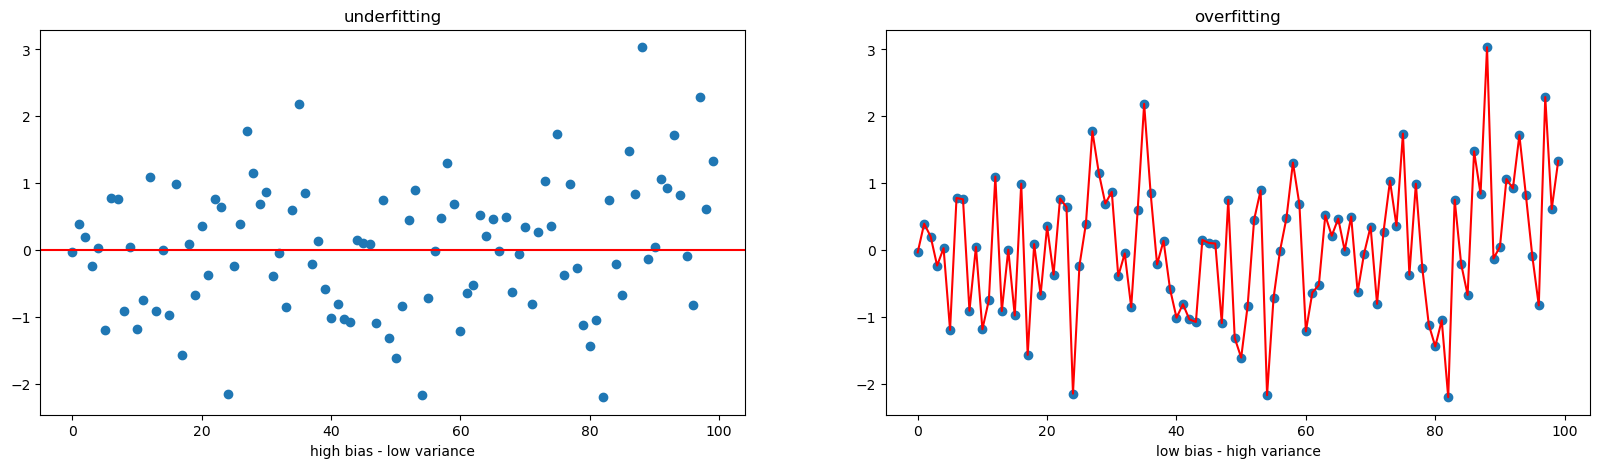

In [21]:
x = np.random.randn(100)

# plot the path
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(x, marker='o', linestyle='')
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_title('underfitting')
ax[0].set_xlabel('high bias - low variance')
ax[1].plot(x, marker='o', linestyle='')
ax[1].plot(x, color='r', linestyle='-')
ax[1].set_title('overfitting')
ax[1].set_xlabel('low bias - high variance')
plt.show()

Both, the `bias` and the `variance` are a function of model complexity. In the chart on the left, our model is a constant and hence not very complex, whereas the model on the right illustrates an extreme case of model complexity. While the `bias` usually decreases with model complexity, the `variance` increases with model complexity. This creates a trade-off, i.e. the `bias-variance` tradeoff. 

In application we now face the issue that we can usually fit the data arbitrarily well **in sample**, e.g. by adding increasingly many predictors. However, we are usually interested in the **out-of-sample** forecasting performance, i.e. the models predictive capabilities on new data:

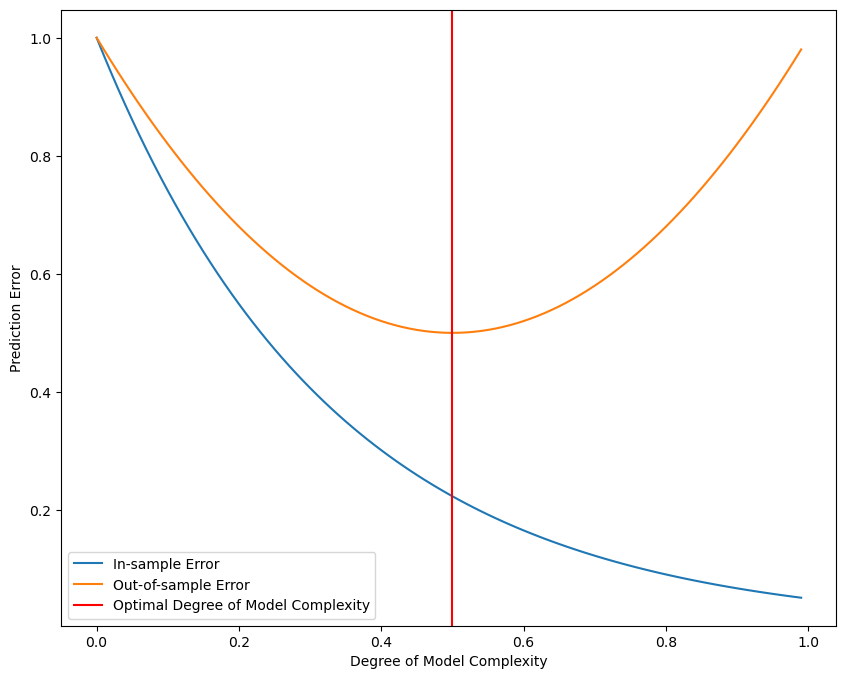

In [22]:
x = np.arange(0,100)/100

# plot the path
fig, ax = plt.subplots()
ax.plot(x,np.exp(-3*x), color='C0', linestyle='-',label='In-sample Error')
ax.plot(x,2*((x-0.5)**2)+0.5, color='C1', linestyle='-',label='Out-of-sample Error')
ax.axvline(x=0.5, color='r', linestyle='-',label='Optimal Degree of Model Complexity')
ax.set_xlabel('Degree of Model Complexity')
ax.set_ylabel('Prediction Error')
ax.legend()
plt.show()

The out-of-sample error is non-monotonic in the degree of model complexity due to the bias-variance tradeoff, i.e. there is a point at which the forecasting performance starts diminishing, if model complexity is increased further. 

Models that `underfit` the data (lie to the left of the optimal degree of model complexity) are too "simple". They do not generalize well, because they leave useful information unexploited. In this situation we face high bias, but low variance. 
* Imagine predicting house prices with just the number of rooms. Likely other factors matter a lot as well (as we have seen).

On the contrary, models that `overfit`the data (lie to the right of the optimal degree of model complexity) are too complex. They do not generalize well because they pick up on many idiosyncracies that help explain a set of training data, but tell us nothing about new data. In this case the bias is low, but the variance is high.
* In our house price example, adding information on the current color of the bedroom walls, the cut hight of the front lawn, the shape of the letter box, the length of the driveway,... is unlikely to lead to better predictions out-of-sample.

In reality we of course do not necessarily know which predictors or other model characteristics get us the most bang for the buck. Variable and model selection is thus one of the big challenges that we face.

Above we already learned how to use Cross-Validation as a tool to compute the expected out-of-sample error. In the next session, we will see how we can combine this tool with shrinkage estimators to tweak the bias-variance tradeoff in our favor and to help us with model and variable selection. 


## References
Copas, John B. "Regression, prediction and shrinkage." Journal of the Royal Statistical Society: Series B (Methodological) 45, no. 3 (1983): 311-335.